In [1]:
import pandas as pd

autos = pd.read_csv("input_data/autos.csv", na_values='?')

In [2]:
autos["make-encoded"] = autos.groupby("make")["price"].transform("mean")

autos[["make", "price", "make-encoded"]].head(10)

,make,price,make-encoded
0,alfa-romero,13495.0,15498.333333
1,alfa-romero,16500.0,15498.333333
2,alfa-romero,16500.0,15498.333333
3,audi,13950.0,17859.166667
4,audi,17450.0,17859.166667
5,audi,15250.0,17859.166667
6,audi,17710.0,17859.166667
7,audi,18920.0,17859.166667
8,audi,23875.0,17859.166667
9,audi,NaN,17859.166667


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


df = pd.read_csv("input_data/movielens1m.csv")
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

Number of Unique Zipcodes: 3439


In [5]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [7]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

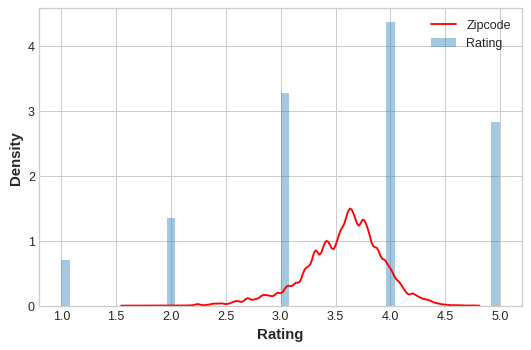

In [8]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);